<a href="https://colab.research.google.com/github/pranali-kirolkar/MSCPROJECT/blob/main/LogisticRe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
print("Libraries Loaded")

Libraries Loaded


In [3]:
#Sales of Summer clothes Dataset
Dataset = pd.read_csv('/content/SalesSummerClothes.csv')

In [4]:
#Dropanelement
Dataset.drop('Timestamp',axis=1,inplace=True)

In [5]:
#Dropanelement
Dataset.drop('Name',axis=1,inplace=True)

In [6]:
Dataset

,Age,Buy_Clothes,Type_Clothes,Brand_Clothes,Price,time_prefer,prefer_purchasing,compare_prices,worst_experience,Rating
0,18-25,Occasionally,"Jeans,Women Dress,Ladies Tops","NIKE,Adidas",500-700,During the sales,Online,YES,No,4
1,18-25,Occasionally,"T-shirt,Jeans","NIKE,Adidas,H&M",700-1000,During the sales,Online,YES,Yes,3
2,18-25,Occasionally,"T-shirt,Jeans,Women Dress,Casual Dress,Ladies ...","NIKE,Adidas,H&M,ZARA",200-500,During the sales,By them in Store,YES,Yes,3
3,18-25,Occasionally,Women Dress,NIKE,500-700,During the sales,By them in Store,YES,Yes,4
4,18-25,Occasionally,Women Dress,Meesho,500-700,Without the sales (Off Season),Online,YES,No,5
...,...,...,...,...,...,...,...,...,...,...
197,18-25,Occasionally,Casual Dress,H&M,500-700,During the sales,By them in Store,YES,No,4
198,18-25,Regularly,"Women Dress,Casual Dress,Ladies Tops","Adidas,H&M",1000-above,During the sales,By them in Store,YES,No,4
199,18-25,Regularly,"T-shirt,Jeans,Ladies Tops",Adidas,700-1000,During the sales,By them in Store,YES,No,4
200,18-25,Occasionally,"T-shirt,Jeans",Adidas,700-1000,Without the sales (Off Season),By them in Store,NO,No,4


In [7]:
#showfirstfiveElements
Dataset.head()

,Age,Buy_Clothes,Type_Clothes,Brand_Clothes,Price,time_prefer,prefer_purchasing,compare_prices,worst_experience,Rating
0,18-25,Occasionally,"Jeans,Women Dress,Ladies Tops","NIKE,Adidas",500-700,During the sales,Online,YES,No,4
1,18-25,Occasionally,"T-shirt,Jeans","NIKE,Adidas,H&M",700-1000,During the sales,Online,YES,Yes,3
2,18-25,Occasionally,"T-shirt,Jeans,Women Dress,Casual Dress,Ladies ...","NIKE,Adidas,H&M,ZARA",200-500,During the sales,By them in Store,YES,Yes,3
3,18-25,Occasionally,Women Dress,NIKE,500-700,During the sales,By them in Store,YES,Yes,4
4,18-25,Occasionally,Women Dress,Meesho,500-700,Without the sales (Off Season),Online,YES,No,5


In [8]:
#ShowLastFiveElements
Dataset.tail()

,Age,Buy_Clothes,Type_Clothes,Brand_Clothes,Price,time_prefer,prefer_purchasing,compare_prices,worst_experience,Rating
197,18-25,Occasionally,Casual Dress,H&M,500-700,During the sales,By them in Store,YES,No,4
198,18-25,Regularly,"Women Dress,Casual Dress,Ladies Tops","Adidas,H&M",1000-above,During the sales,By them in Store,YES,No,4
199,18-25,Regularly,"T-shirt,Jeans,Ladies Tops",Adidas,700-1000,During the sales,By them in Store,YES,No,4
200,18-25,Occasionally,"T-shirt,Jeans",Adidas,700-1000,Without the sales (Off Season),By them in Store,NO,No,4
201,35-50,Occasionally,"Women Dress,Casual Dress","H&M,ZARA",700-1000,During the sales,By them in Store,YES,Yes,4


In [9]:
Dataset.columns


Index(['Age', 'Buy_Clothes', 'Type_Clothes', 'Brand_Clothes', 'Price',
       'time_prefer ', 'prefer_purchasing ', 'compare_prices ',
       'worst_experience', 'Rating '],
      dtype='object')

In [10]:
one_hot_data = pd.get_dummies(Dataset[['Buy_Clothes','Type_Clothes','Brand_Clothes','compare_prices ','worst_experience','time_prefer ']])

In [11]:
one_hot_data

,Buy_Clothes_Occasionally,Buy_Clothes_Regularly,Type_Clothes_Casual Dress,"Type_Clothes_Casual Dress,Ladies Tops",Type_Clothes_Jeans,"Type_Clothes_Jeans,Casual Dress","Type_Clothes_Jeans,Ladies Tops","Type_Clothes_Jeans,Women Dress","Type_Clothes_Jeans,Women Dress,Casual Dress","Type_Clothes_Jeans,Women Dress,Casual Dress,Ladies Tops","Type_Clothes_Jeans,Women Dress,Ladies Tops",Type_Clothes_Short's,Type_Clothes_T-shirt,"Type_Clothes_T-shirt, Gents","Type_Clothes_T-shirt,Casual Dress","Type_Clothes_T-shirt,Jeans","Type_Clothes_T-shirt,Jeans,Casual Dress","Type_Clothes_T-shirt,Jeans,Casual Dress, Formal dress","Type_Clothes_T-shirt,Jeans,Ladies Tops","Type_Clothes_T-shirt,Jeans,Women Dress","Type_Clothes_T-shirt,Jeans,Women Dress,Casual Dress","Type_Clothes_T-shirt,Jeans,Women Dress,Casual Dress,Ladies Tops","Type_Clothes_T-shirt,Jeans,Women Dress,Casual Dress,Ladies Tops, Saree","Type_Clothes_T-shirt,Ladies Tops","Type_Clothes_T-shirt,Women Dress","Type_Clothes_T-shirt,Women Dress,Casual Dress,Ladies Tops","Type_Clothes_T-shirt,Women Dress,Ladies Tops",Type_Clothes_Women Dress,"Type_Clothes_Women Dress,Casual Dress","Type_Clothes_Women Dress,Casual Dress,Ladies Tops","Type_Clothes_Women Dress,Ladies Tops",Brand_Clothes_Adidas,"Brand_Clothes_Adidas,H&M","Brand_Clothes_Adidas,H&M,LEVIS","Brand_Clothes_Adidas,H&M,ZARA","Brand_Clothes_Adidas,H&M,ZARA,LEVIS","Brand_Clothes_Adidas,LEVIS",Brand_Clothes_Don't know,Brand_Clothes_Fasla,"Brand_Clothes_GUCCI,Adidas",...,"Brand_Clothes_GUCCI,Adidas,H&M,ZARA,LEVIS","Brand_Clothes_GUCCI,Adidas,ZARA","Brand_Clothes_GUCCI,H&M,ZARA,LEVIS","Brand_Clothes_GUCCI,ZARA,LEVIS",Brand_Clothes_H&M,"Brand_Clothes_H&M,LEVIS","Brand_Clothes_H&M,ZARA","Brand_Clothes_H&M,ZARA,LEVIS",Brand_Clothes_LEVIS,Brand_Clothes_Local shops,Brand_Clothes_Meesho,Brand_Clothes_NIKE,"Brand_Clothes_NIKE,Adidas","Brand_Clothes_NIKE,Adidas,H&M","Brand_Clothes_NIKE,Adidas,H&M,LEVIS","Brand_Clothes_NIKE,Adidas,H&M,ZARA","Brand_Clothes_NIKE,Adidas,H&M,ZARA,LEVIS","Brand_Clothes_NIKE,Adidas,LEVIS","Brand_Clothes_NIKE,Adidas,ZARA","Brand_Clothes_NIKE,Adidas,ZARA,LEVIS","Brand_Clothes_NIKE,GUCCI","Brand_Clothes_NIKE,GUCCI,Adidas","Brand_Clothes_NIKE,GUCCI,Adidas,H&M","Brand_Clothes_NIKE,GUCCI,Adidas,H&M,LEVIS","Brand_Clothes_NIKE,GUCCI,Adidas,LEVIS","Brand_Clothes_NIKE,GUCCI,Adidas,ZARA,LEVIS","Brand_Clothes_NIKE,GUCCI,H&M,ZARA","Brand_Clothes_NIKE,GUCCI,H&M,ZARA,LEVIS","Brand_Clothes_NIKE,H&M","Brand_Clothes_NIKE,H&M,ZARA,LEVIS","Brand_Clothes_NIKE,LEVIS","Brand_Clothes_NIKE,ZARA",Brand_Clothes_ZARA,"Brand_Clothes_ZARA,LEVIS",compare_prices _NO,compare_prices _YES,worst_experience_No,worst_experience_Yes,time_prefer _During the sales,time_prefer _Without the sales (Off Season)
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0

In [12]:
one_hot_data = pd.get_dummies(Dataset[['Buy_Clothes','Type_Clothes','Brand_Clothes','compare_prices ','worst_experience','time_prefer ']],drop_first=True)

In [13]:
one_hot_data

,Buy_Clothes_Regularly,"Type_Clothes_Casual Dress,Ladies Tops",Type_Clothes_Jeans,"Type_Clothes_Jeans,Casual Dress","Type_Clothes_Jeans,Ladies Tops","Type_Clothes_Jeans,Women Dress","Type_Clothes_Jeans,Women Dress,Casual Dress","Type_Clothes_Jeans,Women Dress,Casual Dress,Ladies Tops","Type_Clothes_Jeans,Women Dress,Ladies Tops",Type_Clothes_Short's,Type_Clothes_T-shirt,"Type_Clothes_T-shirt, Gents","Type_Clothes_T-shirt,Casual Dress","Type_Clothes_T-shirt,Jeans","Type_Clothes_T-shirt,Jeans,Casual Dress","Type_Clothes_T-shirt,Jeans,Casual Dress, Formal dress","Type_Clothes_T-shirt,Jeans,Ladies Tops","Type_Clothes_T-shirt,Jeans,Women Dress","Type_Clothes_T-shirt,Jeans,Women Dress,Casual Dress","Type_Clothes_T-shirt,Jeans,Women Dress,Casual Dress,Ladies Tops","Type_Clothes_T-shirt,Jeans,Women Dress,Casual Dress,Ladies Tops, Saree","Type_Clothes_T-shirt,Ladies Tops","Type_Clothes_T-shirt,Women Dress","Type_Clothes_T-shirt,Women Dress,Casual Dress,Ladies Tops","Type_Clothes_T-shirt,Women Dress,Ladies Tops",Type_Clothes_Women Dress,"Type_Clothes_Women Dress,Casual Dress","Type_Clothes_Women Dress,Casual Dress,Ladies Tops","Type_Clothes_Women Dress,Ladies Tops","Brand_Clothes_Adidas,H&M","Brand_Clothes_Adidas,H&M,LEVIS","Brand_Clothes_Adidas,H&M,ZARA","Brand_Clothes_Adidas,H&M,ZARA,LEVIS","Brand_Clothes_Adidas,LEVIS",Brand_Clothes_Don't know,Brand_Clothes_Fasla,"Brand_Clothes_GUCCI,Adidas","Brand_Clothes_GUCCI,Adidas,H&M","Brand_Clothes_GUCCI,Adidas,H&M,ZARA","Brand_Clothes_GUCCI,Adidas,H&M,ZARA,LEVIS","Brand_Clothes_GUCCI,Adidas,ZARA","Brand_Clothes_GUCCI,H&M,ZARA,LEVIS","Brand_Clothes_GUCCI,ZARA,LEVIS",Brand_Clothes_H&M,"Brand_Clothes_H&M,LEVIS","Brand_Clothes_H&M,ZARA","Brand_Clothes_H&M,ZARA,LEVIS",Brand_Clothes_LEVIS,Brand_Clothes_Local shops,Brand_Clothes_Meesho,Brand_Clothes_NIKE,"Brand_Clothes_NIKE,Adidas","Brand_Clothes_NIKE,Adidas,H&M","Brand_Clothes_NIKE,Adidas,H&M,LEVIS","Brand_Clothes_NIKE,Adidas,H&M,ZARA","Brand_Clothes_NIKE,Adidas,H&M,ZARA,LEVIS","Brand_Clothes_NIKE,Adidas,LEVIS","Brand_Clothes_NIKE,Adidas,ZARA","Brand_Clothes_NIKE,Adidas,ZARA,LEVIS","Brand_Clothes_NIKE,GUCCI","Brand_Clothes_NIKE,GUCCI,Adidas","Brand_Clothes_NIKE,GUCCI,Adidas,H&M","Brand_Clothes_NIKE,GUCCI,Adidas,H&M,LEVIS","Brand_Clothes_NIKE,GUCCI,Adidas,LEVIS","Brand_Clothes_NIKE,GUCCI,Adidas,ZARA,LEVIS","Brand_Clothes_NIKE,GUCCI,H&M,ZARA","Brand_Clothes_NIKE,GUCCI,H&M,ZARA,LEVIS","Brand_Clothes_NIKE,H&M","Brand_Clothes_NIKE,H&M,ZARA,LEVIS","Brand_Clothes_NIKE,LEVIS","Brand_Clothes_NIKE,ZARA",Brand_Clothes_ZARA,"Brand_Clothes_ZARA,LEVIS",compare_prices _YES,worst_experience_Yes,time_prefer _Without the sales (Off Season)
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
198,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [88]:
one_hot_data.columns

Index(['Buy_Clothes_Regularly', 'Type_Clothes_Casual Dress,Ladies Tops',
       'Type_Clothes_Jeans', 'Type_Clothes_Jeans,Casual Dress',
       'Type_Clothes_Jeans,Ladies Tops', 'Type_Clothes_Jeans,Women Dress',
       'Type_Clothes_Jeans,Women Dress,Casual Dress',
       'Type_Clothes_Jeans,Women Dress,Casual Dress,Ladies Tops',
       'Type_Clothes_Jeans,Women Dress,Ladies Tops', 'Type_Clothes_Short's ',
       'Type_Clothes_T-shirt', 'Type_Clothes_T-shirt, Gents',
       'Type_Clothes_T-shirt,Casual Dress', 'Type_Clothes_T-shirt,Jeans',
       'Type_Clothes_T-shirt,Jeans,Casual Dress',
       'Type_Clothes_T-shirt,Jeans,Casual Dress, Formal dress',
       'Type_Clothes_T-shirt,Jeans,Ladies Tops',
       'Type_Clothes_T-shirt,Jeans,Women Dress',
       'Type_Clothes_T-shirt,Jeans,Women Dress,Casual Dress',
       'Type_Clothes_T-shirt,Jeans,Women Dress,Casual Dress,Ladies Tops',
       'Type_Clothes_T-shirt,Jeans,Women Dress,Casual Dress,Ladies Tops, Saree',
       'Type_Clothes_T-sh

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [90]:
Dataset['Buy_Clothes'].value_counts()

Regularly       118
Occasionally     84
Name: Buy_Clothes, dtype: int64

Logistics

In [91]:
train, test = train_test_split(one_hot_data, test_size =0.20)

In [92]:
lr = LogisticRegression()
columns = ['Type_Clothes_Women Dress','worst_experience_Yes','Buy_Clothes_Regularly']

lr.fit(one_hot_data[columns], one_hot_data['compare_prices _YES'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
X = train[columns]
y = train['compare_prices _YES']

train_X, val_X, train_y, val_y = train_test_split(
    X, y, test_size=0.20,random_state=0)


In [20]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(val_X)
accuracy = accuracy_score(val_y, predictions)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(val_y,predictions))

0.9090909090909091
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.91      1.00      0.95        30

    accuracy                           0.91        33
   macro avg       0.45      0.50      0.48        33
weighted avg       0.83      0.91      0.87        33



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
cm1 = confusion_matrix(val_y, predictions)
cm1

array([[ 0,  3],
       [ 0, 30]])

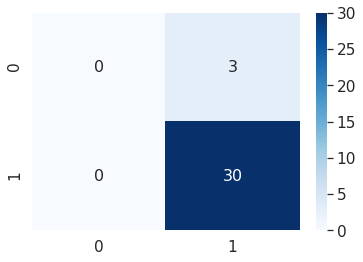

In [22]:
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

In [24]:
train, test = train_test_split(Dataset, test_size =0.25)

In [25]:
train.shape

(151, 10)

In [26]:
test.shape

(51, 10)

svm

In [29]:
from sklearn import svm

In [30]:
svmf = svm.SVC(C=10000000, kernel='rbf', degree=4)

In [34]:
model_svm = svmf.fit(train_X, train_y)

In [37]:
pred_svm = model_svm.predict(X)

In [38]:
accuracy_score(y, pred_svm)*100

91.92546583850931

random forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rf1 = RandomForestClassifier(max_depth=4, n_estimators = 10)
rf1.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
rf1_model_pred = rf1.predict(train_X)

In [109]:
rf1_model_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [112]:
sat_test_score_rf = accuracy_score(train_y, rf1_model_pred)*100
sat_test_score_rf

89.84375

In [117]:
rd = print(classification_report(train_y, rf1_model_pred))
rf_cm = confusion_matrix(train_y, rf1_model_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.90      1.00      0.95       115

    accuracy                           0.90       128
   macro avg       0.45      0.50      0.47       128
weighted avg       0.81      0.90      0.85       128



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


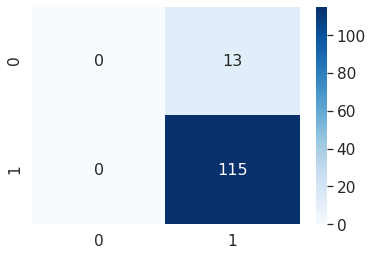

In [118]:
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') 
plt.show()